I will be using Machine Learning Models to predict the Airline Customers Satisifaction rate by using open datasource . Before that, I will be taking necessary steps to set up the data:

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the csv file
data = pd.read_csv('Invistico_Airline.csv')

In [3]:
data['satisfaction_num'] = np.where(data['satisfaction'] == 'satisfied',1,0)

In [4]:
data = data.drop('satisfaction',axis=1)

In [5]:
#data size
data.shape

(129880, 23)

In [6]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_num
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1


## Categorical Data

I'm going to convert categorical data using dummies variables.

In [7]:
cat = data[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

In [8]:
#Dummy variables 
dummie = pd.get_dummies(cat)

In [9]:
# concat the data with the database and drop the original columns
df = pd.concat([data,dummie],axis=1)

In [10]:
df.shape

(129880, 32)

In [11]:
#Dropping Original Columns
df = df.drop([ 'Gender', 'Customer Type', 'Type of Travel', 'Class'],axis=1)

In [12]:
df.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,satisfaction_num,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,1,1,0,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,1,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,1,1,0,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,1,0,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,1,1,0,1,0,0,1,0,1,0


In [13]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

# Model

In [14]:
#Setting Variables
X = df.drop('satisfaction_num',axis=1)
y = df['satisfaction_num']

In [15]:
#splitting the data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Accuary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Hypertunning 
from sklearn.model_selection import GridSearchCV

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97410, 27), (32470, 27), (97410,), (32470,))

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\jaspr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
%%time
log_pred = logreg.predict(X_test)
train_log_pred = logreg.predict(X_train)
leg_score = accuracy_score(log_pred,y_test)
test_score = accuracy_score(train_log_pred,y_train)
print('model 1 accuracy score {} on Testing Data'.format(leg_score))
print('model 1 accuracy score {} on Training Data'.format(test_score))

model 1 accuracy score 0.7885124730520481 on Testing Data
model 1 accuracy score 0.7909454881429011 on Training Data
Wall time: 96.7 ms


              precision    recall  f1-score   support

           0       0.80      0.71      0.75     14608
           1       0.78      0.85      0.82     17862

    accuracy                           0.79     32470
   macro avg       0.79      0.78      0.78     32470
weighted avg       0.79      0.79      0.79     32470



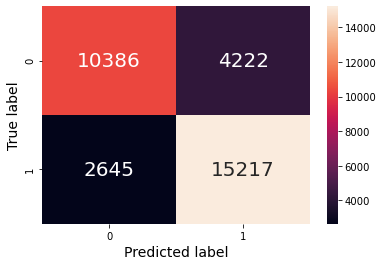

In [19]:
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
confusion_matrix = confusion_matrix(y_test, log_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
print(classification_report(y_test,log_pred))

In [20]:
Knn = KNeighborsClassifier()
Knn.fit(X_train,y_train)
knn_pred = Knn.predict(X_test)
knn_train_pred = Knn.predict(X_train)
knn_score = accuracy_score(knn_pred, y_test)
knn_train_score = accuracy_score(knn_train_pred, y_train)

print('model 2 accuracy score {} testing'.format(knn_score))
print('model 2 accuracy score {} training'.format(knn_train_score))

model 2 accuracy score 0.7044656606097937 testing
model 2 accuracy score 0.8106662560312083 training


In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_train_pred = rfc.predict(X_train)

rfc_score = accuracy_score(rfc_pred,y_test)
rfc_train_score = accuracy_score(rfc_train_pred,y_train)

print('model 3 accuracy score {} testing'.format(rfc_score))
print('model 3 accuracy score {} training'.format(rfc_train_score))

model 3 accuracy score 0.9572528487834925 testing
model 3 accuracy score 1.0 training


So the model 3 is best model on the data so far,but we clearly see an underfitting going on

# Hyperparameter Tuning

In [23]:
rfc=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc,param_grid =param_grid,cv= 5,verbose =1,n_jobs = -1)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 33.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300]},
             verbose=1)

In [24]:
print('rfc best params:', CV_rfc.best_params_)
print('rfc scores:', CV_rfc.best_score_)

rfc best params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
rfc scores: 0.9216918180884919


In [25]:
CV_ref_pred = CV_rfc.predict(X_test)

In [26]:
print('Train Accuracy:',accuracy_score(y_train, CV_rfc.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test, CV_ref_pred))

Train Accuracy: 0.9235396776511652
Test Accuracy: 0.9230674468740375


In [27]:
rfc1 = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 300)
rfc1.fit(X_train,y_train)
rfc_pred = rfc1.predict(X_test)
rfc_train_pred = rfc1.predict(X_train)

rfc_score = accuracy_score(rfc_pred,y_test)
rfc_train_score = accuracy_score(rfc_train_pred,y_train)

print('model 4 accuracy score {} testing'.format(rfc_score))
print('model 4 accuracy score {} training'.format(rfc_train_score))

model 4 accuracy score 0.9243609485679088 testing
model 4 accuracy score 0.9243712144543681 training


In [29]:
col = X.columns
feat_importances = pd.Series(CV_rfc.best_estimator_.feature_importances_,index=col)

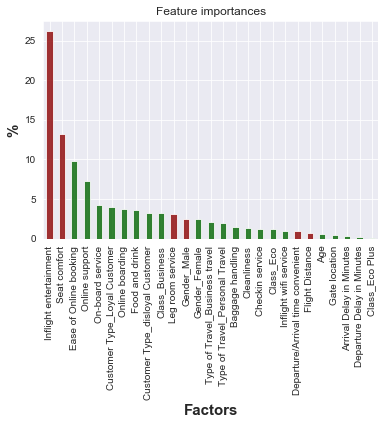

In [30]:
import matplotlib.style as style 
sns.set_style("darkgrid")

barplot = feat_importances.mul(100).nlargest(30)
colormat= ['darkred','darkred','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'
           ,'darkgreen','darkgreen'  ]

barplot.plot(kind='bar',title='Feature importances', color = colormat, alpha = 0.8)
#barplot[0]('darkred')
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('%', fontsize = 15, weight = 'bold')
plt.show()

## Save Model

In [28]:
import pickle
pickl = {'model': CV_rfc}
pickle.dump( pickl, open( 'model_file_1' + ".p", "wb" ) )

In [32]:
import pickle
import gzip
pickl = {'model': CV_rfc}

def save_zipped_pickle(pickl, filename, protocol=-1):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(pickl, f, protocol)

## Test Flask in Production

In [33]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [38]:
model.predict(np.array(list(X_test.iloc[777,:])).reshape(1,-1))[0]


1

In [37]:
X_test.iloc[777,:]

Age                                    18
Flight Distance                      1595
Seat comfort                            5
Departure/Arrival time convenient       5
Food and drink                          5
Gate location                           1
Inflight wifi service                   2
Inflight entertainment                  5
Online support                          2
Ease of Online booking                  2
On-board service                        4
Leg room service                        2
Baggage handling                        5
Checkin service                         3
Cleanliness                             4
Online boarding                         2
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
Gender_Female                           1
Gender_Male                             0
Customer Type_Loyal Customer            0
Customer Type_disloyal Customer         1
Type of Travel_Business travel          1
Type of Travel_Personal Travel    